In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Glassdoor-%20Analyze%20Gender%20Pay%20Gap/Glassdoor%20Gender%20Pay%20Gap.csv")
df.head()

df['TotalPay'] = df['BasePay'] + df['Bonus']

gender_dummies = pd.get_dummies(df['Gender'])
dept_dummies = pd.get_dummies(df['Dept'])
df = df.join(gender_dummies)
del df['Gender']
del df['Male'] 
df['Education'] = np.where(df['Education'].isin(['College', 'Masters', 'PhD']), 1, 0)

df.head()

,JobTitle,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay,Female
0,Graphic Designer,18,5,1,Operations,2,42363,9938,52301,1
1,Software Engineer,21,5,1,Management,5,108476,11128,119604,0
2,Warehouse Associate,19,4,1,Administration,5,90208,9268,99476,1
3,Software Engineer,20,5,1,Sales,4,108080,10154,118234,0
4,Graphic Designer,26,5,1,Engineering,5,99464,9319,108783,0


In [3]:
X = df[['Age']].values
y = df['TotalPay'].values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 1) (800,)
Test set: (200, 1) (200,)


In [4]:
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)

print (f'Coefficients: {regr.coef_}')
print (f'Intercept: {regr.intercept_}')

Coefficients: [939.76533429]
Intercept: 61577.59620056475


Text(0, 0.5, 'Total pay per year')

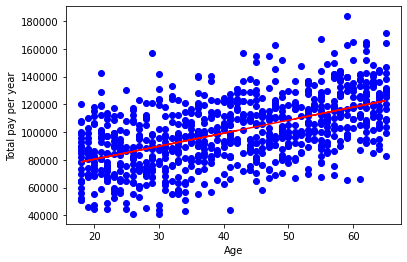

In [5]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regr.coef_[0] * X_train + regr.intercept_, '-r')  # gradient * x + intercept
plt.xlabel("Age")
plt.ylabel("Total pay per year")

In [6]:
y_test_pred = regr.predict(X_test)

print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_test_pred)}')
print(f'R2 Score: {r2_score(y_test , y_test_pred)}')

Mean Squared Error (MSE): 508065500.2883171
R2 Score: 0.24787164813251428


In [7]:
X = df.loc[:, ~df.columns.isin(['BasePay', 'Bonus', 'JobTitle', 'Dept', 'TotalPay'])].values
y = df['TotalPay'].values

print('Independent variables: {}'.format(df.loc[:, ~df.columns.isin(['BasePay', 'Bonus', 'JobTitle', 'Dept', 'TotalPay'])].columns.values))

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Independent variables: ['Age' 'PerfEval' 'Education' 'Seniority' 'Female']
Train set: (800, 5) (800,)
Test set: (200, 5) (200,)


In [8]:
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)

print (f'Coefficients: {regr.coef_}')
print (f'Intercept: {regr.intercept_}')

Coefficients: [   960.16959348    734.33619703   4664.8070167    9631.11189259
 -10410.75370526]
Intercept: 31258.715819032033


In [9]:
y_test_pred = regr.predict(X_test)

print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_test_pred)}')
print(f'R2 Score: {r2_score(y_test , y_test_pred)}')

Mean Squared Error (MSE): 277234107.3688191
R2 Score: 0.5895890743645553


In [10]:
employee_data = [[27, 5, 1, 3, 1]]
salary = regr.predict(employee_data)
print(f'Estimated salary: {salary[0]:.2f} USD')

Estimated salary: 84002.36 USD


In [11]:
X = df[['Age']].values
y = df['TotalPay'].values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
print ('Train set polynomial:', X_train_poly.shape,  y_train.shape)

Train set: (800, 1) (800,)
Test set: (200, 1) (200,)
Train set polynomial: (800, 3) (800,)


In [12]:
regr = linear_model.LinearRegression()
regr.fit (X_train_poly, y_train)

print (f'Coefficients: {regr.coef_}')
print (f'Intercept: {regr.intercept_}')

Coefficients: [  0.         307.74031385   7.65547146]
Intercept: 73056.8380003197
